In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Combined_Data_with_Voltages.csv', index_col=0)
df = df[['FT_Voltage1', 'FT_Voltage2', 'DN_Voltage1', 'DN_Voltage2']]
df

,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2
DateTime,,,,
2022-01-10 00:00:00,0.0,0.0,0.0,0.0
2022-01-10 00:01:00,0.0,0.0,0.0,0.0
2022-01-10 00:02:00,0.0,0.0,0.0,0.0
2022-01-10 00:03:00,0.0,0.0,0.0,0.0
2022-01-10 00:04:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2022-04-19 23:55:00,0.0,0.0,0.0,0.0
2022-04-19 23:56:00,0.0,0.0,0.0,0.0
2022-04-19 23:57:00,0.0,0.0,0.0,0.0


In [ ]:
FT_Voltage1 = df['FT_Voltage1']
FT_Voltage2 = df['FT_Voltage2']
DN_Voltage1 = df['DN_Voltage1']
DN_Voltage2 = df['DN_Voltage2']

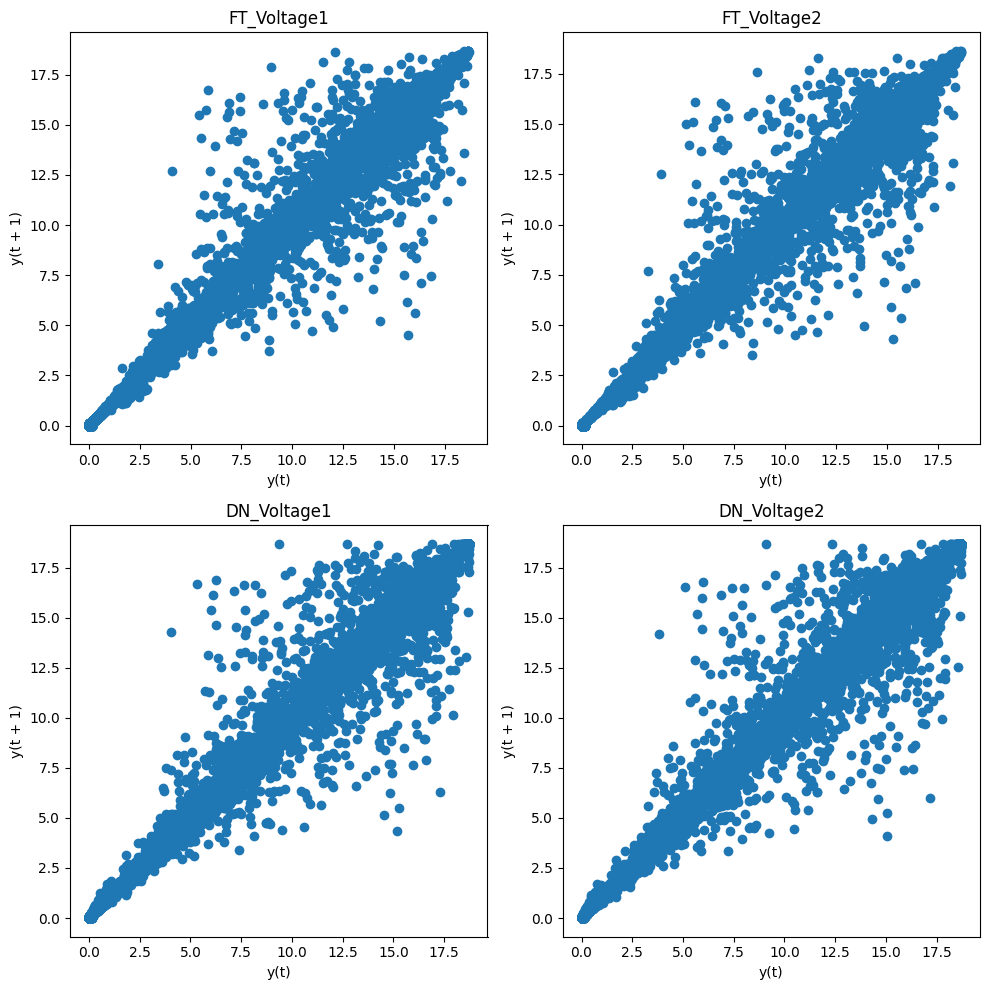

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
lag_plot(FT_Voltage1, lag=1)
plt.title('FT_Voltage1')
plt.subplot(2, 2, 2)
lag_plot(FT_Voltage2, lag=1)
plt.title('FT_Voltage2')
plt.subplot(2, 2, 3)
lag_plot(DN_Voltage1, lag=1)
plt.title('DN_Voltage1')
plt.subplot(2, 2, 4)
lag_plot(DN_Voltage2, lag=1)
plt.title('DN_Voltage2')
plt.tight_layout()
plt.show()

In [3]:
# Make a copy df1 using first 20 days of df using the datetime index
df1 = df.loc['2022-01-01':'2022-01-20'].copy()
df1

,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2
DateTime,,,,
2022-01-10 00:00:00,0.0,0.0,0.0,0.0
2022-01-10 00:01:00,0.0,0.0,0.0,0.0
2022-01-10 00:02:00,0.0,0.0,0.0,0.0
2022-01-10 00:03:00,0.0,0.0,0.0,0.0
2022-01-10 00:04:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2022-01-19 23:55:00,0.0,0.0,0.0,0.0
2022-01-19 23:56:00,0.0,0.0,0.0,0.0
2022-01-19 23:57:00,0.0,0.0,0.0,0.0


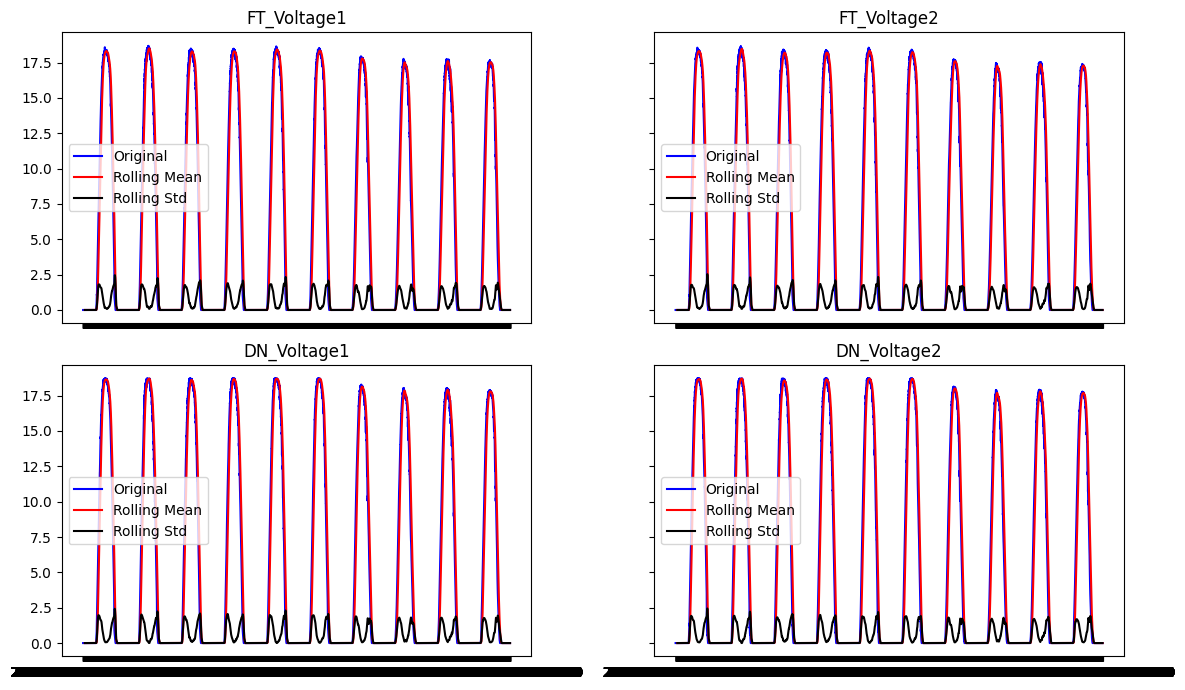

In [9]:
# Plot rolling statistics for each column as a subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()):
    data = df1[df1.columns[i]]
    ax.plot(data, color='blue', label='Original')
    ax.plot(data.rolling(window=60).mean(), color='red', label='Rolling Mean')
    ax.plot(data.rolling(window=60).std(), color='black', label='Rolling Std')
    ax.set_title(df1.columns[i])
    ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
for i in df1.columns:
    dftest = adfuller(df1[i], autolag='AIC')
    print('Results of Dickey-Fuller Test for', i)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput, '\n')


Results of Dickey-Fuller Test for FT_Voltage1
Test Statistic                -9.563466e+00
p-value                        2.391436e-16
#Lags Used                     4.200000e+01
Number of Observations Used    1.435700e+04
Critical Value (1%)           -3.430806e+00
Critical Value (5%)           -2.861741e+00
Critical Value (10%)          -2.566877e+00
dtype: float64 

Results of Dickey-Fuller Test for FT_Voltage2
Test Statistic                -9.567468e+00
p-value                        2.336173e-16
#Lags Used                     4.200000e+01
Number of Observations Used    1.435700e+04
Critical Value (1%)           -3.430806e+00
Critical Value (5%)           -2.861741e+00
Critical Value (10%)          -2.566877e+00
dtype: float64 

Results of Dickey-Fuller Test for DN_Voltage1
Test Statistic                -8.871643e+00
p-value                        1.392817e-14
#Lags Used                     4.200000e+01
Number of Observations Used    1.435700e+04
Critical Value (1%)           -3.430

In [ ]:
#Standard ARIMA Model
import pmdarima as pm
ARIMA_model = pm.auto_arima(df1['FT_Voltage1'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

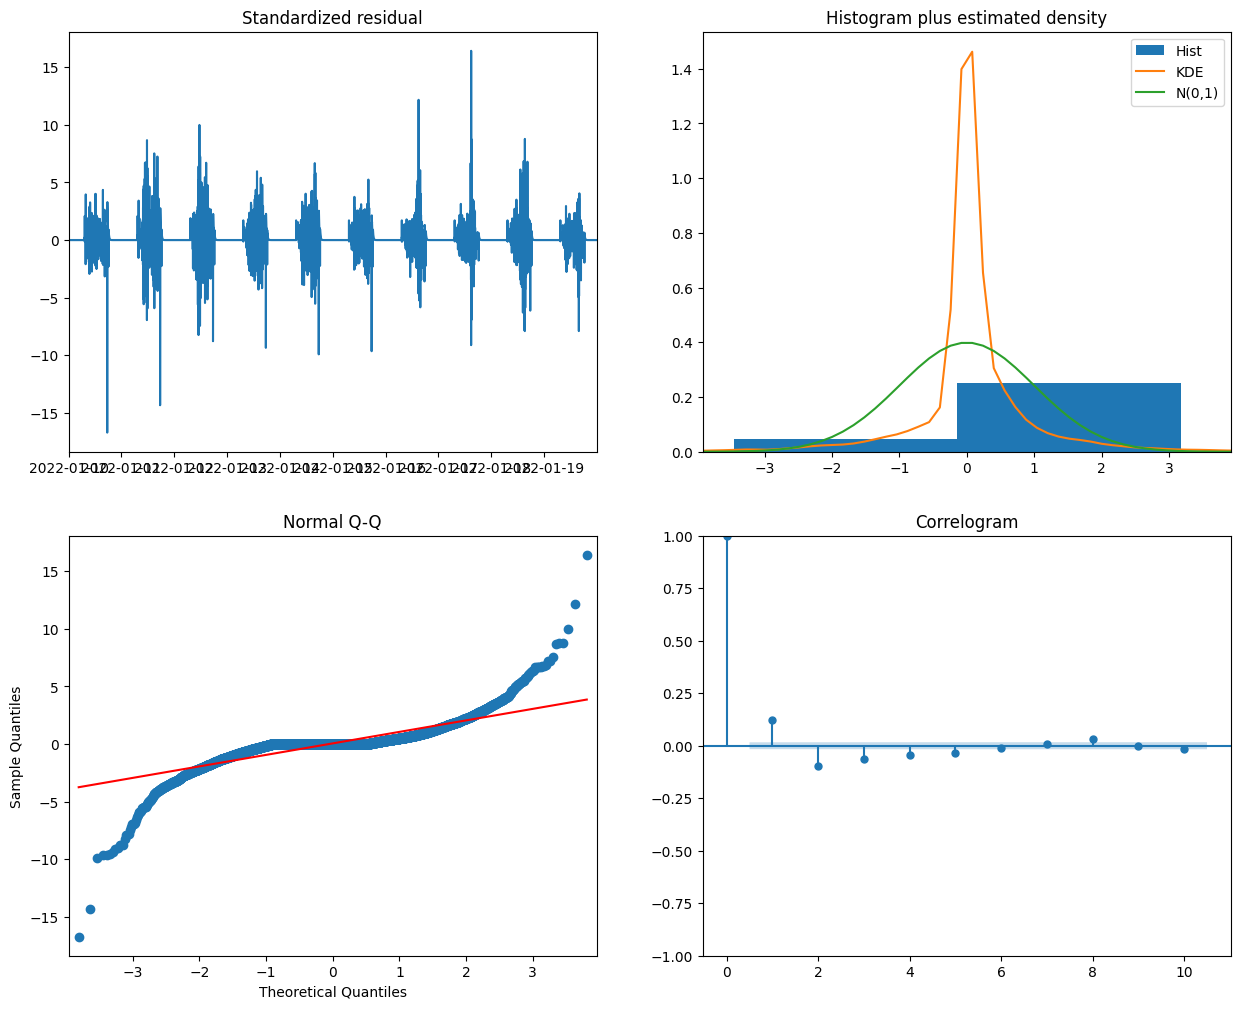

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [4]:
df2 = df1['FT_Voltage1']

In [5]:
df2.index = pd.to_datetime(df2.index)

In [6]:
def forecast(ARIMA_model, periods=10000):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df2.index[-1] + pd.DateOffset(minute=1), periods = n_periods, freq='T')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df2, color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)
    plt.show()

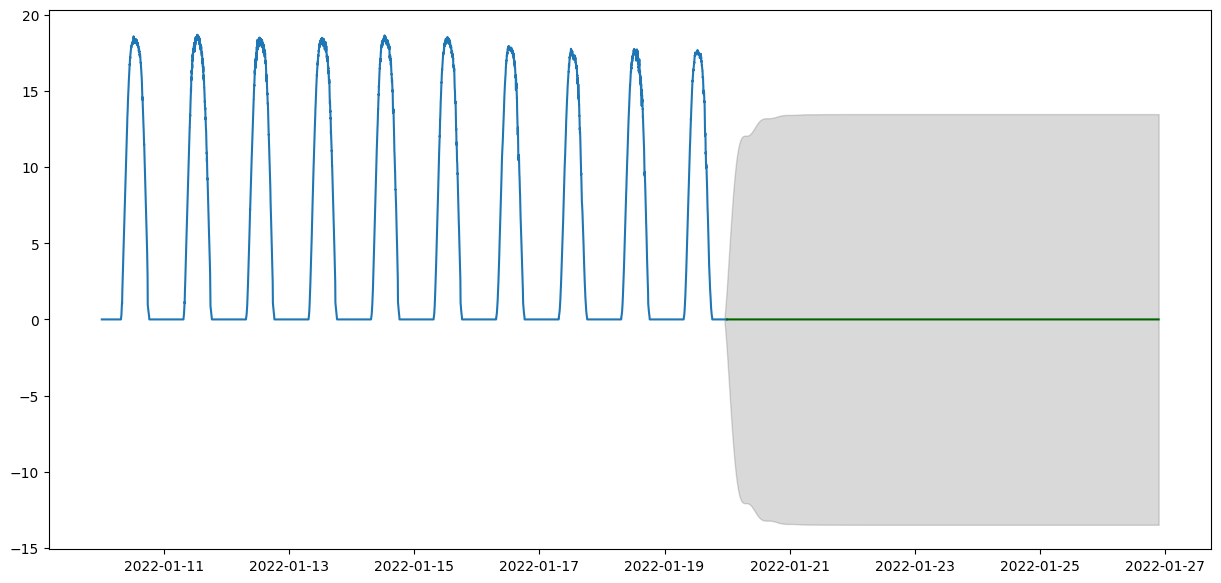

In [20]:
forecast(ARIMA_model)

In [10]:
# Resample df2 to hourly data
df3 = df2.resample('H').sum()
df3

DateTime
2022-01-10 00:00:00    0.0
2022-01-10 01:00:00    0.0
2022-01-10 02:00:00    0.0
2022-01-10 03:00:00    0.0
2022-01-10 04:00:00    0.0
                      ... 
2022-01-19 19:00:00    0.0
2022-01-19 20:00:00    0.0
2022-01-19 21:00:00    0.0
2022-01-19 22:00:00    0.0
2022-01-19 23:00:00    0.0
Freq: H, Name: FT_Voltage1, Length: 240, dtype: float64

In [11]:
import pmdarima as pm
SARIMA_model = pm.auto_arima(df3, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=24, 
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

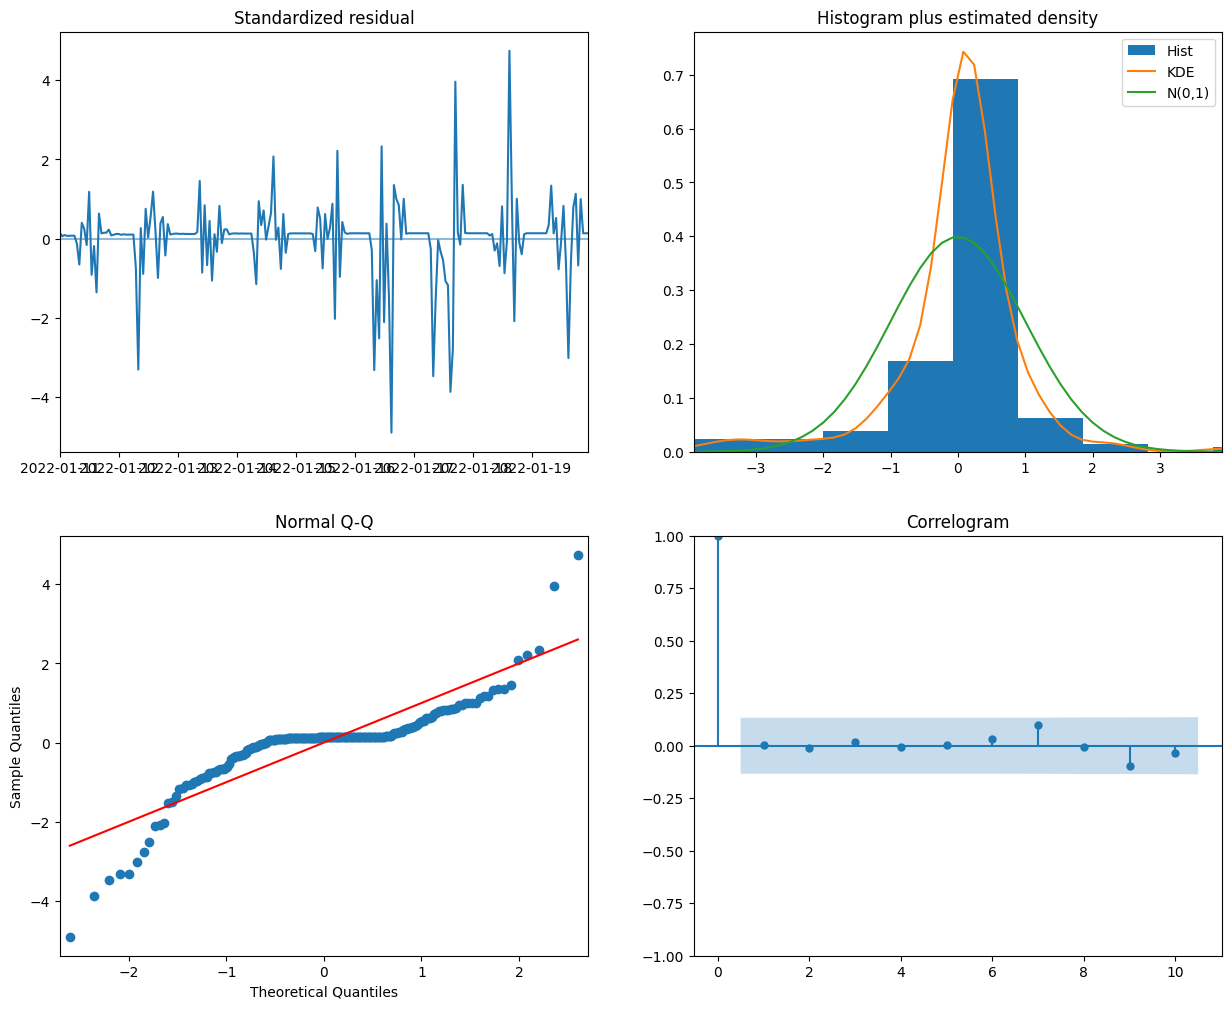

In [12]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

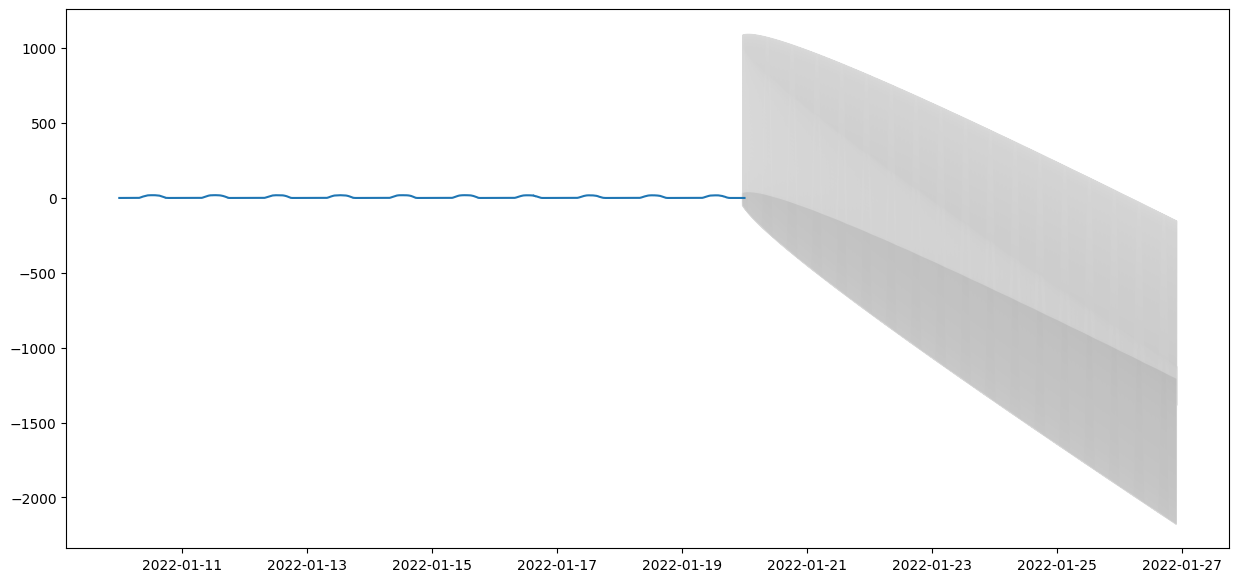

In [13]:
forecast(SARIMA_model)

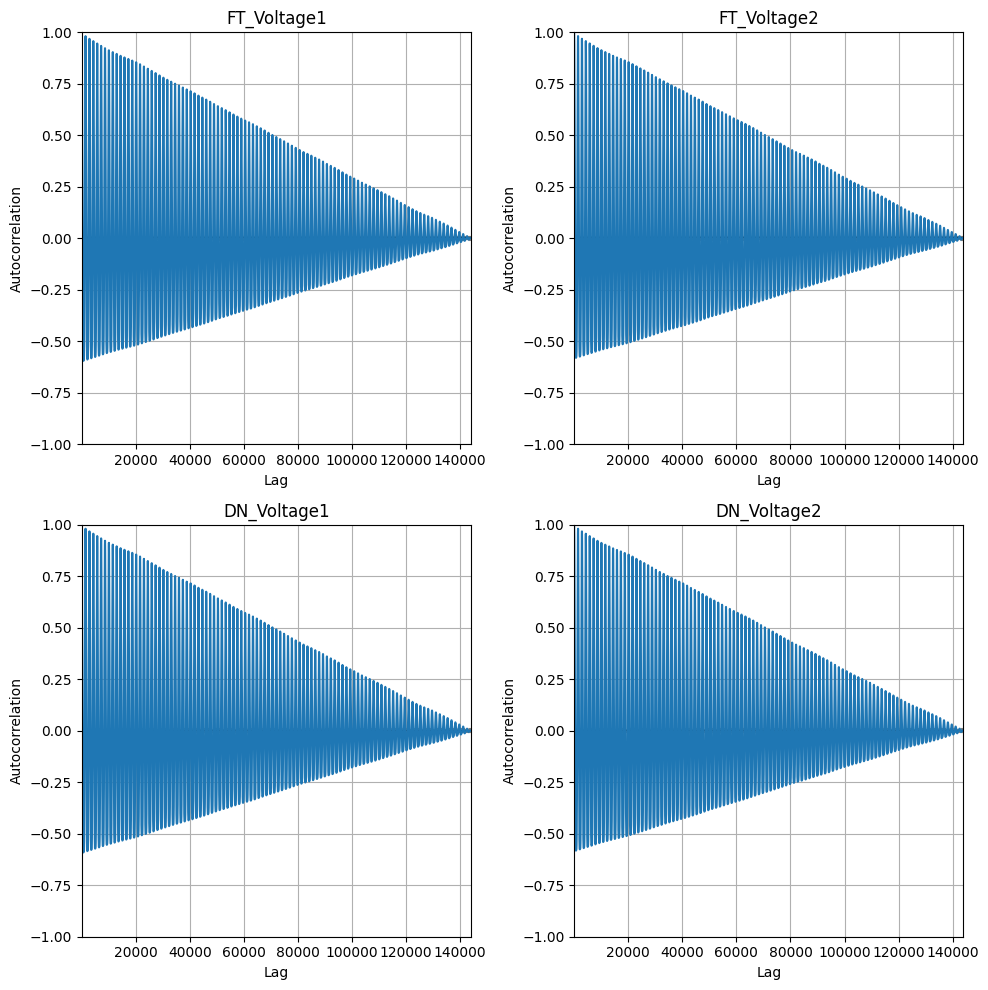

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
autocorrelation_plot(FT_Voltage1)
plt.title('FT_Voltage1')
plt.subplot(2, 2, 2)
autocorrelation_plot(FT_Voltage2)
plt.title('FT_Voltage2')
plt.subplot(2, 2, 3)
autocorrelation_plot(DN_Voltage1)
plt.title('DN_Voltage1')
plt.subplot(2, 2, 4)
autocorrelation_plot(DN_Voltage2)
plt.title('DN_Voltage2')
plt.tight_layout()
plt.show()

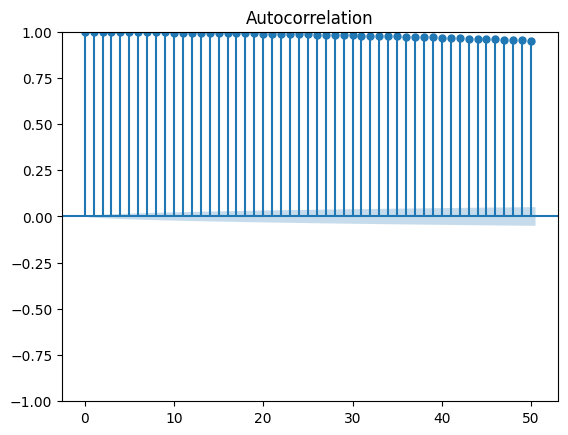

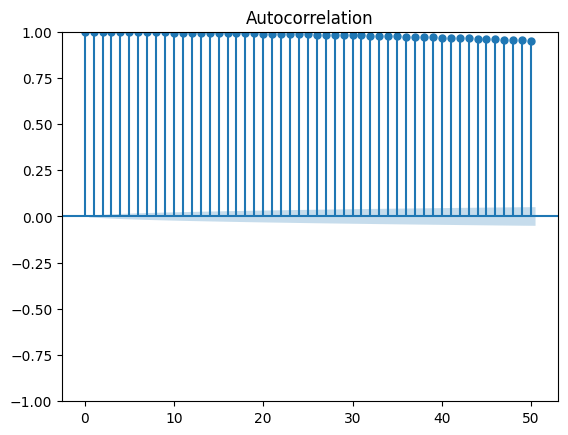

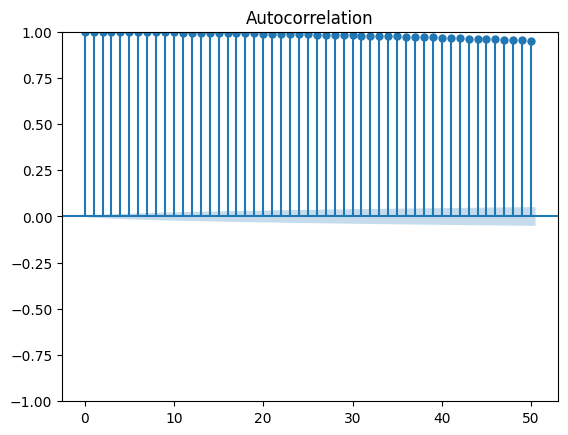

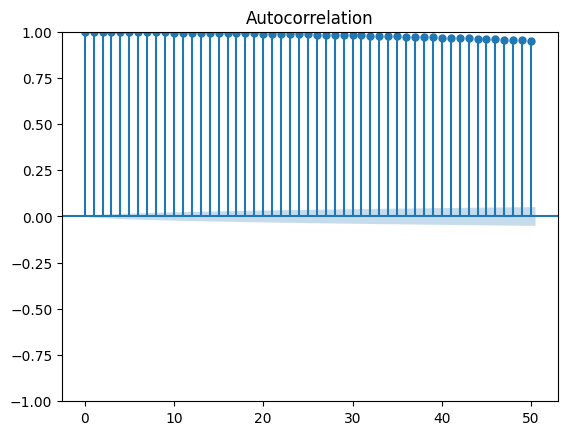

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(FT_Voltage1, lags=50)
plt.show()
plot_acf(FT_Voltage2, lags=50)
plt.show()
plot_acf(DN_Voltage1, lags=50)
plt.show()
plot_acf(DN_Voltage2, lags=50)
plt.show()

In [ ]:
model = AutoReg(FT_Voltage1, lags=20)
model_fit = model.fit()

/home/mirlab/anaconda3/envs/gnn/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:            FT_Voltage1   No. Observations:               144000
Model:                    AutoReg(20)   Log Likelihood               -4355.426
Method:               Conditional MLE   S.D. of innovations              0.249
Date:                Wed, 28 Jun 2023   AIC                           8754.853
Time:                        17:21:46   BIC                           8972.156
Sample:                    01-10-2022   HQIC                          8819.737
                         - 04-19-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0040      0.001      4.831      0.000       0.002       0.006
FT_Voltage1.L1      0.9138      0.003    347.121      0.000       0.909       0.919
FT_Voltage1.L2     -0.0565      